In [18]:
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import flopy
import sys
import shutil

In [6]:
def tick_label_formatter_comma_sep(x, pos):
    return '{:,.0f}'.format(x)


def volumetric_budget_bar_plot(values_in, values_out, labels, **kwargs):
    if 'ax' in kwargs:
        ax = kwargs.pop('ax')
    else:
        ax = plt.gca()

    x_pos = np.arange(len(values_in))
    rects_in = ax.bar(x_pos, values_in, align='center', alpha=0.5)

    x_pos = np.arange(len(values_out))
    rects_out = ax.bar(x_pos, values_out, align='center', alpha=0.5)

    plt.xticks(list(x_pos), labels)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(tick_label_formatter_comma_sep))

    ymin, ymax = ax.get_ylim()
    if ymax != 0:
        if abs(ymin) / ymax < .33:
            ymin = -(ymax * .5)
        else:
            ymin *= 1.35
    else:
        ymin *= 1.35
    plt.ylim([ymin, ymax * 1.25])

    for i, rect in enumerate(rects_in):
        label = '{:,.0f}'.format(values_in[i])
        height = values_in[i]
        x = rect.get_x() + rect.get_width() / 2
        y = height + (.02 * ymax)
        vertical_alignment = 'bottom'
        horizontal_alignment = 'center'
        ax.text(x, y, label, ha=horizontal_alignment, va=vertical_alignment, rotation=90)

    for i, rect in enumerate(rects_out):
        label = '{:,.0f}'.format(values_out[i])
        height = values_out[i]
        x = rect.get_x() + rect.get_width() / 2
        y = height + (.02 * ymin)
        vertical_alignment = 'top'
        horizontal_alignment = 'center'
        ax.text(x, y, label, ha=horizontal_alignment, va=vertical_alignment, rotation=90)

    # horizontal line indicating zero
    ax.plot([rects_in[0].get_x() - rects_in[0].get_width() / 2,
             rects_in[-1].get_x() + rects_in[-1].get_width()], [0, 0], "k")

    return rects_in, rects_out

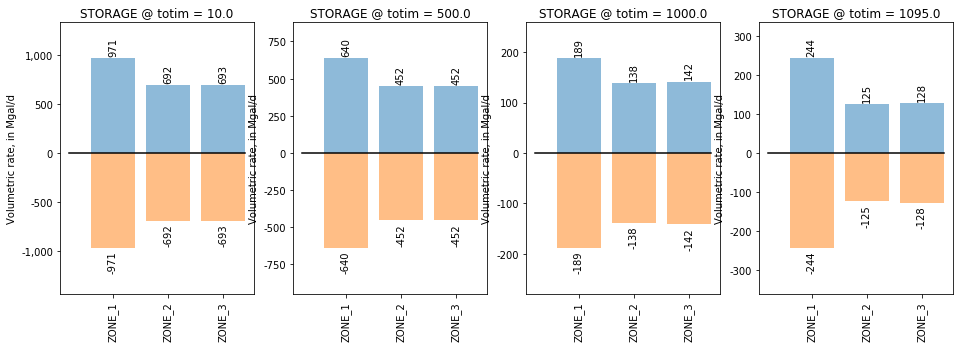

In [45]:
fig = plt.figure(figsize=(16, 5))
f_out =  "extractedBudget-original.csv"

times = [10., 500., 1000., 1095.]
for idx, t in enumerate(times):
    ax = fig.add_subplot(1, len(times), idx + 1)
    storage = pd.read_csv(f_out)    
    recname = 'STORAGE'
    labels = ['ZONE_1', 'ZONE_2', 'ZONE_3']
    values_in = storage[(storage.name =='{}_IN'.format(recname)) & (storage.totim == t)][labels].T.squeeze()
    values_out = storage[(storage.name =='{}_IN'.format(recname)) & (storage.totim == t)][labels].T.squeeze() * -1
    rects_in, rects_out = volumetric_budget_bar_plot(values_in, values_out, labels, ax=ax)
    plt.ylabel('Volumetric rate, in Mgal/d')
    plt.title('{} @ totim = {}'.format(recname, t))


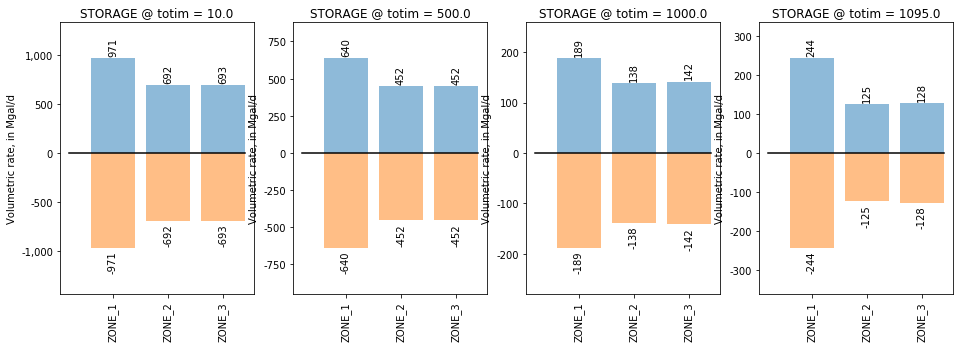

In [47]:
fig = plt.figure(figsize=(16, 5))
f_out =  "extractedBudget-reproduced.csv"

times = [10., 500., 1000., 1095.]
for idx, t in enumerate(times):
    ax = fig.add_subplot(1, len(times), idx + 1)
    storage = pd.read_csv(f_out)    
    recname = 'STORAGE'
    labels = ['ZONE_1', 'ZONE_2', 'ZONE_3']
    values_in = storage[(storage.name =='FROM_{}'.format(recname)) & (storage.totim == t)][labels].T.squeeze()
    values_out = storage[(storage.name =='FROM_{}'.format(recname)) & (storage.totim == t)][labels].T.squeeze() * -1
    rects_in, rects_out = volumetric_budget_bar_plot(values_in, values_out, labels, ax=ax)
    plt.ylabel('Volumetric rate, in Mgal/d')
    plt.title('{} @ totim = {}'.format(recname, t))
